#### Importing necessary libraries

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#### Loading and preparing the dataset

In [2]:
personality_data = pd.read_csv('personality_dataset.csv')

In [3]:
# Checking for missing values
personality_data.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [4]:
personality_data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [5]:
personality_data.shape

(2900, 8)

In [6]:
personality_data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


#### Plotting a heatmap

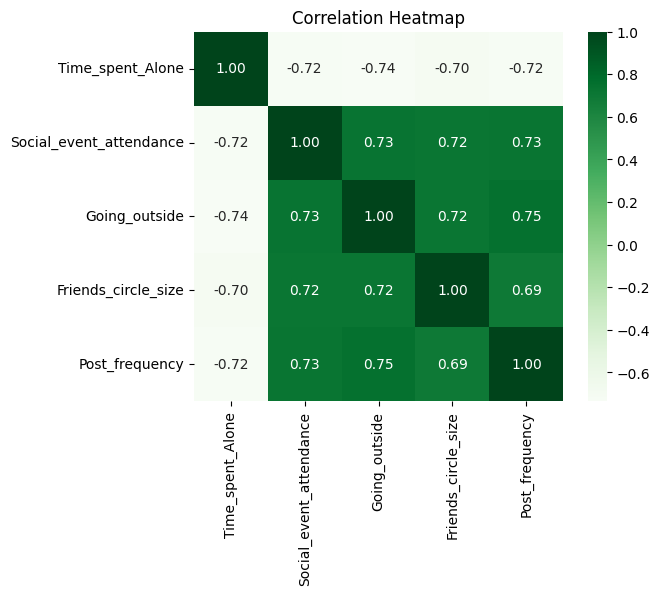

In [7]:
# Heatmap
personality_data_temp = personality_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = personality_data_temp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

#### Preparing the data

In [8]:
features = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
X = pd.get_dummies(personality_data[features])
y = pd.get_dummies(personality_data['Personality'])
model_columns = y.columns


#### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 

#### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Creating the ANN

In [11]:
# Importing necessary libraries 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import ReLU 

In [18]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Early Stopping

In [21]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [22]:
model_history = model.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
)

Epoch 1/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5927 - loss: 0.5923 - val_accuracy: 0.9264 - val_loss: 0.4594
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9399 - loss: 0.3487 - val_accuracy: 0.9218 - val_loss: 0.2974
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9351 - loss: 0.2572 - val_accuracy: 0.9241 - val_loss: 0.2954
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9304 - loss: 0.2809 - val_accuracy: 0.9264 - val_loss: 0.2920
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9438 - loss: 0.2288 - val_accuracy: 0.9264 - val_loss: 0.2887
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9398 - loss: 0.2517 - val_accuracy: 0.9264 - val_loss: 0.2827
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9373 - loss: 0.2538 - val_accuracy: 0.9264 - val_loss: 0.2808
Epoch 8/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9360 - loss: 0.2486 - val_accuracy: 0.9264 - v

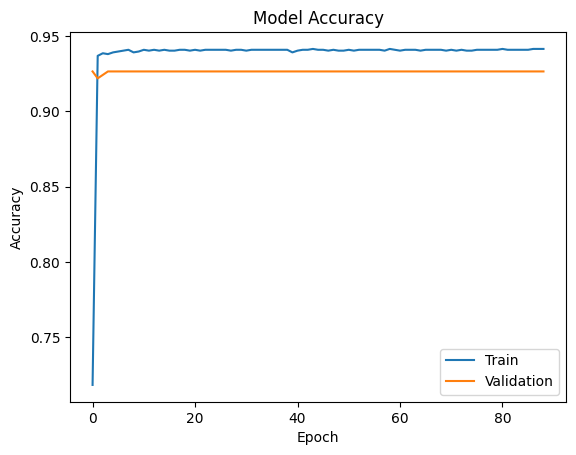

In [23]:
# Accuracy history summary
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()



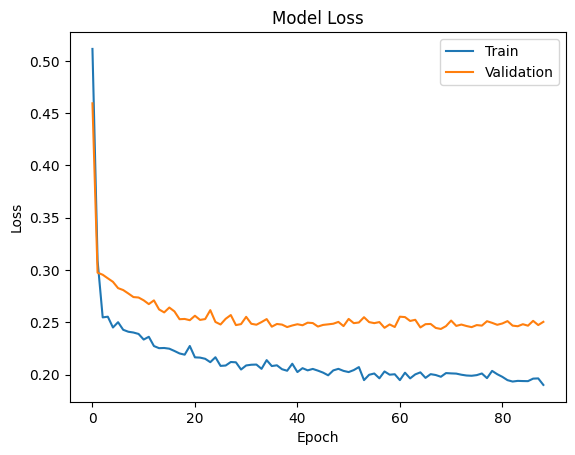

In [24]:
# Loss history summary
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()



In [25]:
# Predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test.values, axis=1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_classes, predicted_classes)
cm 

array([[355,  36],
       [ 19, 315]])

In [28]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       391
           1       0.90      0.94      0.92       334

    accuracy                           0.92       725
   macro avg       0.92      0.93      0.92       725
weighted avg       0.93      0.92      0.92       725



#### Saving the model

In [29]:
import joblib
model.save('personality_model.keras')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']